## IN this notebook, we will classify 28*28 pixel dataset of digits from mnist dataset. We will use Kmeans Clustering/Classification to get our job done.

In [1]:
import sys
import matplotlib
import numpy as np
print(f"sys version: {sys.version}")
print(f"numpy version: {np.__version__}")

sys version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
numpy version: 1.19.0


In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()

In [4]:
print(f"training data: {x_train.shape}")
print(f"training label: {y_train.shape}")
print(f"test data: {x_test.shape}")
print(f"test label: {y_test.shape}")

training data: (60000, 28, 28)
training label: (60000,)
test data: (10000, 28, 28)
test label: (10000,)


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
# python magic function. What are magic functions in python.Few examples for magic methods are: __init__, __add__, __len__, __repr__ etc.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


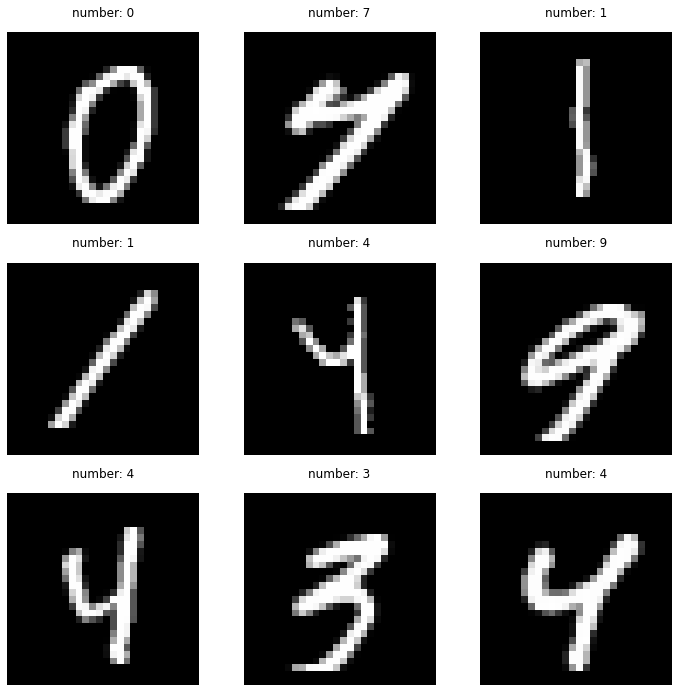

In [13]:
fig, axs = plt.subplots(3,3, figsize =(12,12))
plt.gray()
# # plt.rcParams.keys()

# plt.tick_params(axis = 'both', which = "both", bottom = False, top = False)
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[1000+i])
    ax.axis('off')
    ax.set_title(f"number: {y_train[1000+i]}")
fig.show()

In [11]:
plt.gray?

Signature: plt.gray()
Docstring:
Set the colormap to "gray".

This changes the default colormap as well as the colormap of the current
image if there is one. See ``help(colormaps)`` for more information.
File:      c:\programdata\anaconda3\lib\site-packages\matplotlib\pyplot.py
Type:      function


In [10]:
# plt.rcParams.keys()

In [14]:
#the key take away from this excercise will be, how to use clustering to classify objects

#. First thing will be to flatten our dataset to have a single dimansional data set. We are not using cnn so, our algorithm will only accept a vector for each image
X = x_train.reshape(len(x_train), -1)
y = y_train
print(X.shape)
# now we hace 60k images flattened to 784 pixels each
X = X.astype(float)/255.
# X[0]
# .astype(float)
# .07058824

(60000, 784)


In [15]:
from sklearn.cluster import MiniBatchKMeans

In [16]:
print(np.unique(y_test))
n_digits = len(np.unique(y_train))
print(n_digits)

[0 1 2 3 4 5 6 7 8 9]
10


In [28]:
# Initialize the kmeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits, verbose = 0)
# fit the model

kmeans.fit(X)

MiniBatchKMeans(n_clusters=10)

In [15]:
kmeans.labels_[:20]
# lists out the cluster nos, not the actual digit number as the algo does not know what th actual cluster mean.


# we can assign a specific no for each of the clusters

array([4, 9, 8, 3, 7, 5, 2, 1, 2, 0, 4, 3, 4, 6, 2, 0, 5, 0, 6, 0])

In [18]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels 

In [19]:
def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [20]:
len(y)

60000

In [22]:
infer_cluster_labels(kmeans, y)

{9: [0], 6: [1], 5: [2], 1: [3], 0: [4], 3: [5, 6], 7: [7, 9], 4: [8]}

In [23]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:20])
print (y[:20])

Computing label assignment and total inertia
[3 0 4 1 9 6 1 3 1 7 3 1 3 6 1 7 6 5 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [27]:
#Evalluation and visualization
from sklearn import metrics
def calculate_metrics(estimator, data, labels):
    print(f"no of clusters: {estimator.n_clusters}")
    print(f"inertia: {estimator.inertia_}")
    print(f"homogeneity_score: {metrics.homogeneity_score(labels, estimator.labels_)}")



In [30]:
clusters = [10, 16, 36, 64,144,256]
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    #print metrics
    calculate_metrics(estimator,X,y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
        # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(y, predicted_Y)))

no of clusters: 10
inertia: 2378594.91503584
homogeneity_score: 0.4428018526495949
Accuracy: 0.5498833333333333

no of clusters: 16
inertia: 2253783.414226366
homogeneity_score: 0.5375719685370988
Accuracy: 0.6370833333333333

no of clusters: 36
inertia: 1958982.7591903466
homogeneity_score: 0.6790113457005849
Accuracy: 0.75795

no of clusters: 64
inertia: 1813409.5648759492
homogeneity_score: 0.7384851233283107
Accuracy: 0.8145

no of clusters: 144
inertia: 1635158.731281924
homogeneity_score: 0.8031279444849511
Accuracy: 0.86595

no of clusters: 256
inertia: 1515804.2905359976
homogeneity_score: 0.8345445577304714
Accuracy: 0.8858



In [31]:
# test kmeans algorithm on testing dataset
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, y)

# predict labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.8975



6. Visualizing Cluster Centroids

The most representative point within each cluster is called the centroid. If we were dealing with X,Y points, the centroid would simply be a point on the graph. However, since we are using arrays of length 784, our centroid is also going to be an array of length 784. We can reshape this array back into a 28 by 28 pixel image and plot it.

These graphs will display the most representative image for each cluster.


In [40]:
kmeans=MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)





MiniBatchKMeans(n_clusters=36)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


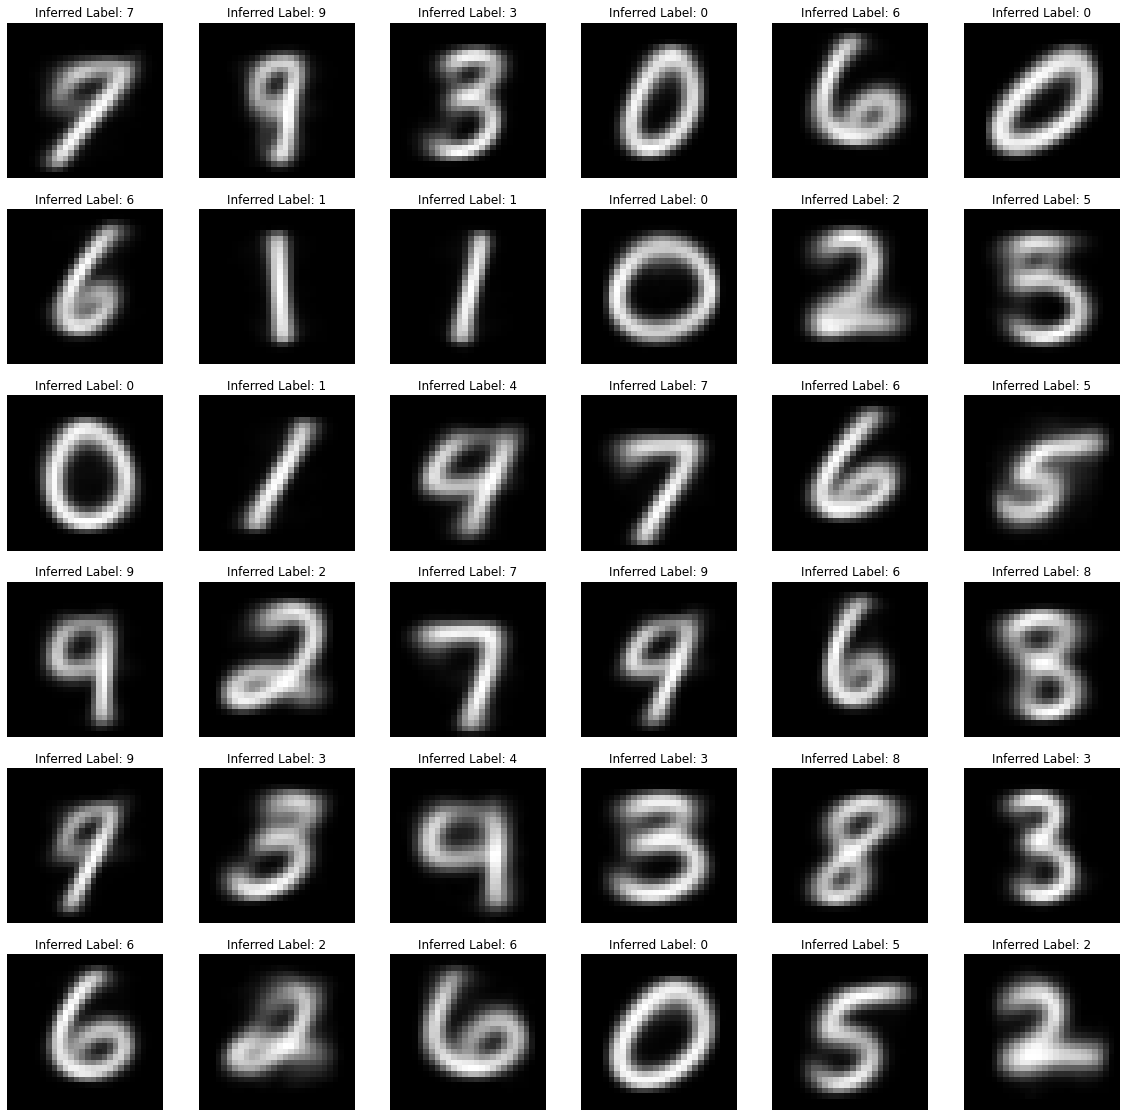

In [41]:

# find the cluster centrids

centroids = kmeans.cluster_centers_

image = centroids.reshape(36, 28,28)

image*=255

image=image.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()
# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.imshow(image[i])
    ax.axis('off')
    
# display the figure
fig.show()